Equation: Power = 20.82 × Temperature + 13.85
Interpretation: For every 1°C increase, power increases by 20.82 kW
At 23°C, predicted power: 492.77 kW
At 27°C, predicted power: 576.06 kW
At 33°C, predicted power: 701.00 kW


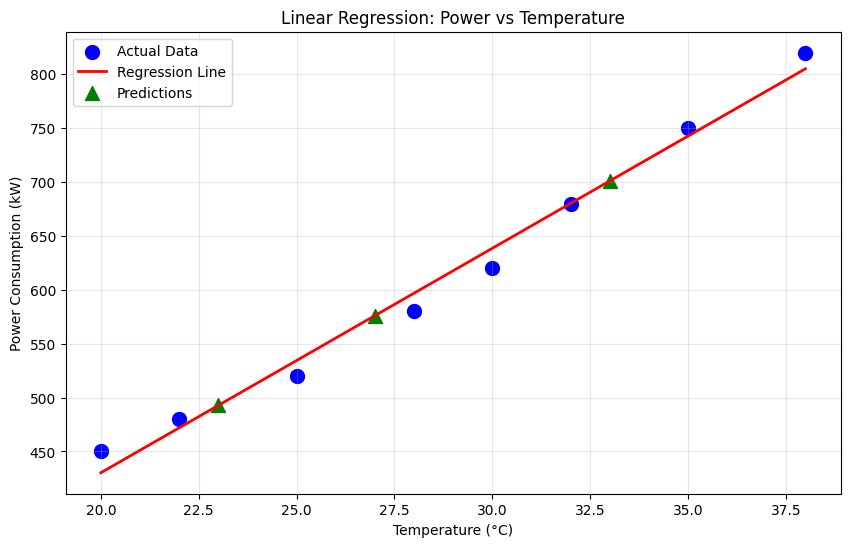


Model Performance:
R² Score: 0.9870 (closer to 1 is better)
RMSE: 13.99 kW


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Example: Power consumption vs Temperature
# As temperature increases, AC load increases (cooling demand)

# Training data
temperature = np.array([20, 22, 25, 28, 30, 32, 35, 38]).reshape(-1, 1)  # °C
power_consumption = np.array([450, 480, 520, 580, 620, 680, 750, 820])  # kW

# Create and train model
model = LinearRegression()
model.fit(temperature, power_consumption)

# Model parameters
slope = model.coef_[0]
intercept = model.intercept_

print(f"Equation: Power = {slope:.2f} × Temperature + {intercept:.2f}")
print(f"Interpretation: For every 1°C increase, power increases by {slope:.2f} kW")

# Make predictions
test_temps = np.array([[23], [27], [33]])
predictions = model.predict(test_temps)

for temp, pred in zip(test_temps.flatten(), predictions):
    print(f"At {temp}°C, predicted power: {pred:.2f} kW")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(temperature, power_consumption, color='blue', s=100, label='Actual Data')
plt.plot(temperature, model.predict(temperature), color='red', linewidth=2,
         label='Regression Line')
plt.scatter(test_temps, predictions, color='green', s=100, marker='^',
           label='Predictions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Power Consumption (kW)')
plt.title('Linear Regression: Power vs Temperature')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Model evaluation
predictions_train = model.predict(temperature)
r2 = r2_score(power_consumption, predictions_train)
rmse = np.sqrt(mean_squared_error(power_consumption, predictions_train))

print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f} (closer to 1 is better)")
print(f"RMSE: {rmse:.2f} kW")

# Reference: Géron (2019), Hands-On Machine Learning with Scikit-Learn

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Multiple features affecting power consumption
np.random.seed(42)
n_samples = 100

# Features
temperature = np.random.uniform(20, 40, n_samples)  # °C
humidity = np.random.uniform(40, 90, n_samples)     # %
is_weekend = np.random.randint(0, 2, n_samples)     # 0=weekday, 1=weekend

# Target: Power consumption (with realistic relationships)
# Higher temp increases load, higher humidity increases load slightly
# Weekends typically have lower commercial/industrial load
power = (15 * temperature +  # Temperature effect
         2 * humidity +      # Humidity effect
         -50 * is_weekend +  # Weekend effect
         np.random.normal(0, 30, n_samples))  # Noise

# Prepare data
X = np.column_stack([temperature, humidity, is_weekend])
y = power

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients - interpret these!
print("Model Coefficients:")
print(f"Temperature: {model.coef_[0]:.2f} kW/°C")
print(f"Humidity: {model.coef_[1]:.2f} kW/%")
print(f"Weekend Effect: {model.coef_[2]:.2f} kW")
print(f"Intercept: {model.intercept_:.2f} kW")

# Evaluate on both train and test
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"\nR² Score on Training: {train_score:.4f}")
print(f"R² Score on Testing: {test_score:.4f}")

# Make prediction for specific conditions
example = np.array([[30, 70, 0]])  # 30°C, 70% humidity, weekday
predicted_power = model.predict(example)
print(f"\nPrediction: At 30°C, 70% humidity, weekday → {predicted_power[0]:.2f} kW")

# Reference: Bishop (2006), Pattern Recognition and Machine Learning

Model Coefficients:
Temperature: 13.94 kW/°C
Humidity: 2.17 kW/%
Weekend Effect: -54.33 kW
Intercept: 24.77 kW

R² Score on Training: 0.8689
R² Score on Testing: 0.9534

Prediction: At 30°C, 70% humidity, weekday → 594.92 kW


Accuracy: 100.00%

Confusion Matrix:
[[50  0]
 [ 0 50]]

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        50
       Fault       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


New Motor Prediction:
Vibration: 3.5 mm/s, Temperature: 55°C
Predicted Class: Normal
Fault Probability: 35.02%


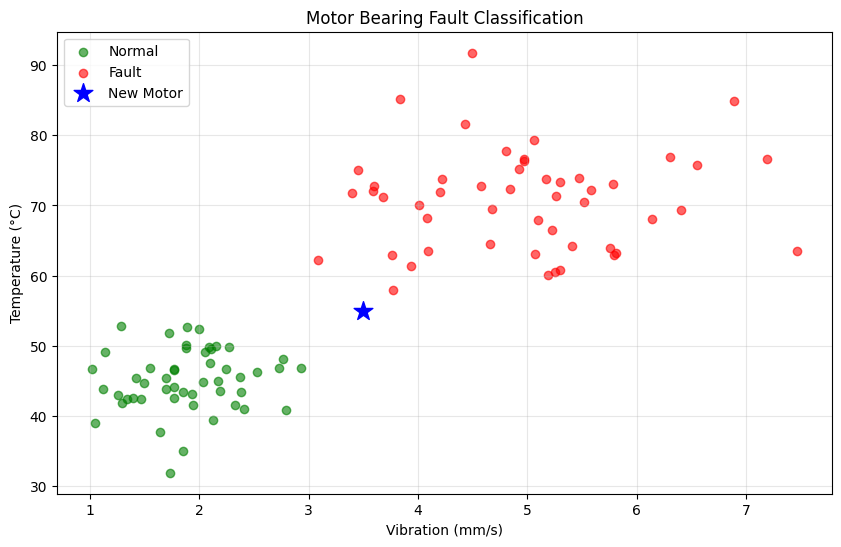

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Simulated motor bearing data
# Features: Vibration (mm/s), Temperature (°C)
np.random.seed(42)

# Normal bearings (Class 0): Lower vibration, normal temperature
normal_vibration = np.random.normal(2, 0.5, 50)  # Mean: 2 mm/s
normal_temp = np.random.normal(45, 5, 50)        # Mean: 45°C

# Faulty bearings (Class 1): Higher vibration, elevated temperature
faulty_vibration = np.random.normal(5, 1, 50)   # Mean: 5 mm/s
faulty_temp = np.random.normal(70, 8, 50)       # Mean: 70°C

# Combine data
X = np.column_stack([
    np.concatenate([normal_vibration, faulty_vibration]),
    np.concatenate([normal_temp, faulty_temp])
])
y = np.array([0]*50 + [1]*50)  # Labels: 0=Normal, 1=Fault

# Train classifier
classifier = LogisticRegression()
classifier.fit(X, y)

# Evaluate
predictions = classifier.predict(X)
accuracy = accuracy_score(y, predictions)

print(f"Accuracy: {accuracy:.2%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y, predictions))
print("\nClassification Report:")
print(classification_report(y, predictions, target_names=['Normal', 'Fault']))

# Test on new motor
new_motor = np.array([[3.5, 55]])  # Intermediate readings
prediction = classifier.predict(new_motor)
probability = classifier.predict_proba(new_motor)

print(f"\nNew Motor Prediction:")
print(f"Vibration: 3.5 mm/s, Temperature: 55°C")
print(f"Predicted Class: {'Fault' if prediction[0] == 1 else 'Normal'}")
print(f"Fault Probability: {probability[0][1]:.2%}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='green', label='Normal', alpha=0.6)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Fault', alpha=0.6)
plt.scatter(new_motor[0, 0], new_motor[0, 1], c='blue', s=200,
           marker='*', label='New Motor')
plt.xlabel('Vibration (mm/s)')
plt.ylabel('Temperature (°C)')
plt.title('Motor Bearing Fault Classification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Reference: IEEE papers on condition monitoring (2024)

Classification Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        10
 Phase-Phase       1.00      1.00      1.00        10
Phase-Ground       1.00      1.00      1.00        10
 Three-Phase       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



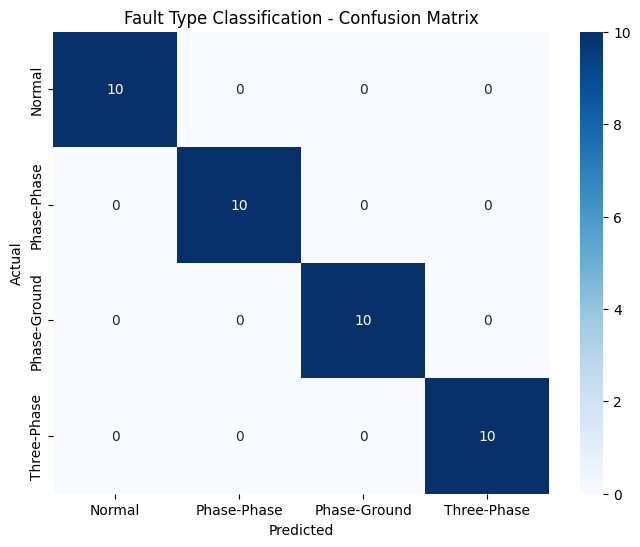

Voltage (V): 0.354
Current (A): 0.338
Phase Angle (°): 0.308


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated fault data
# Classes: 0=Normal, 1=Phase-Phase, 2=Phase-Ground, 3=Three-Phase
np.random.seed(42)
n_samples_per_class = 50

# Features: Voltage magnitude, Current magnitude, Phase angle difference
# Normal operation
normal_data = np.random.multivariate_normal([230, 10, 0],
    [[10, 0, 0], [0, 1, 0], [0, 0, 5]], n_samples_per_class)

# Phase-to-Phase fault: Voltage drop, high current, phase shift
pp_fault = np.random.multivariate_normal([150, 50, 60],
    [[20, 0, 0], [0, 5, 0], [0, 0, 10]], n_samples_per_class)

# Phase-to-Ground fault: Severe voltage drop, very high current
pg_fault = np.random.multivariate_normal([80, 80, 30],
    [[15, 0, 0], [0, 8, 0], [0, 0, 8]], n_samples_per_class)

# Three-phase fault: Voltage collapse, extremely high current
three_phase = np.random.multivariate_normal([30, 120, 120],
    [[10, 0, 0], [0, 10, 0], [0, 0, 15]], n_samples_per_class)

# Combine all data
X = np.vstack([normal_data, pp_fault, pg_fault, three_phase])
y = np.array([0]*n_samples_per_class + [1]*n_samples_per_class +
             [2]*n_samples_per_class + [3]*n_samples_per_class)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

print(f"Classification Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
class_names = ['Normal', 'Phase-Phase', 'Phase-Ground', 'Three-Phase']
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Fault Type Classification - Confusion Matrix')
plt.show()

# Feature importance
feature_names = ['Voltage (V)', 'Current (A)', 'Phase Angle (°)']
importances = clf.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")

# Reference: IEEE Std C37.114™-2014 for protection & fault classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Generate synthetic load data (simulating real power system)
np.random.seed(42)
n_days = 365

# Features
day_of_year = np.arange(n_days)
day_of_week = np.arange(n_days) % 7  # 0=Monday, 6=Sunday
temperature = 25 + 10*np.sin(2*np.pi*day_of_year/365) + \
              np.random.normal(0, 3, n_days)
is_weekend = (day_of_week >= 5).astype(int)

# Step 2: Generate realistic load pattern
base_load = 5000  # Base load in kW
seasonal = 1000 * np.sin(2*np.pi*day_of_year/365)  # Seasonal variation
temp_effect = 50 * temperature  # Temperature effect
weekend_effect = -500 * is_weekend  # Lower weekend load
noise = np.random.normal(0, 100, n_days)  # Measurement noise

load = base_load + seasonal + temp_effect + weekend_effect + noise

# Step 3: Create DataFrame
df = pd.DataFrame({
    'day_of_year': day_of_year,
    'day_of_week': day_of_week,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'load_kW': load
})

print("Dataset Preview:")
print(df.head(10))
print(f"\nDataset shape: {df.shape}")

# Step 4: Prepare features and target
X = df[['day_of_year', 'day_of_week', 'temperature', 'is_weekend']].values
y = df['load_kW'].values

# Step 5: Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Step 6: Train models
print("\n" + "="*50)
print("Training Models...")
print("="*50)

# Model 1: Linear Regression (baseline)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)

# Model 2: Random Forest (more powerful!)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

# Step 7: Evaluate models
print("\n📊 Model Performance:")
print("\nLinear Regression:")
print(f"  Train R²: {r2_score(y_train, lr_pred_train):.4f}")
print(f"  Test R²:  {r2_score(y_test, lr_pred_test):.4f}")
print(f"  Test RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred_test)):.2f} kW")

print("\nRandom Forest:")
print(f"  Train R²: {r2_score(y_train, rf_pred_train):.4f}")
print(f"  Test R²:  {r2_score(y_test, rf_pred_test):.4f}")
print(f"  Test RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred_test)):.2f} kW")

# Step 8: Feature importance (Random Forest)
feature_names = ['day_of_year', 'day_of_week', 'temperature', 'is_weekend']
importances = rf_model.feature_importances_

print("\n🎯 Feature Importance (Random Forest):")
for name, importance in zip(feature_names, importances):
    print(f"  {name}: {importance:.4f}")

# Step 9: Make future prediction
print("\n🔮 Future Prediction:")
future_day = np.array([[370, 0, 32, 0]])  # Day 370, Monday, 32°C, Weekday
future_pred_lr = lr_model.predict(future_day)
future_pred_rf = rf_model.predict(future_day)

print(f"Conditions: Day 370, Monday, 32°C, Weekday")
print(f"Linear Regression Forecast: {future_pred_lr[0]:.2f} kW")
print(f"Random Forest Forecast: {future_pred_rf[0]:.2f} kW")

# Reference: Hong et al. (2016) "Probabilistic energy forecasting: Global Energy
# Forecasting Competition 2014" International Journal of Forecasting

Dataset Preview:
   day_of_year  day_of_week  temperature  is_weekend      load_kW
0            0            0    26.490142           0  6284.385076
1            1            1    24.757341           0  6277.489637
2            2            2    27.287282           0  6400.044938
3            3            3    30.085286           0  6565.651589
4            4            4    24.985564           0  6240.779656
5            5            5    25.157237           1  5846.277672
6            6            6    30.768655           1  6191.334298
7            7            0    28.504385           0  6690.541638
8            8            1    24.964365           0  6481.424083
9            9            2    28.170768           0  6778.165483

Dataset shape: (365, 5)

Training samples: 292
Testing samples: 73

Training Models...

📊 Model Performance:

Linear Regression:
  Train R²: 0.9450
  Test R²:  0.9363
  Test RMSE: 275.29 kW

Random Forest:
  Train R²: 0.9968
  Test R²:  0.9774
  Test RMSE:

Neural Network Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)


Training MAE: 148.36 kW
Testing MAE: 149.88 kW
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Test R²: 0.5009


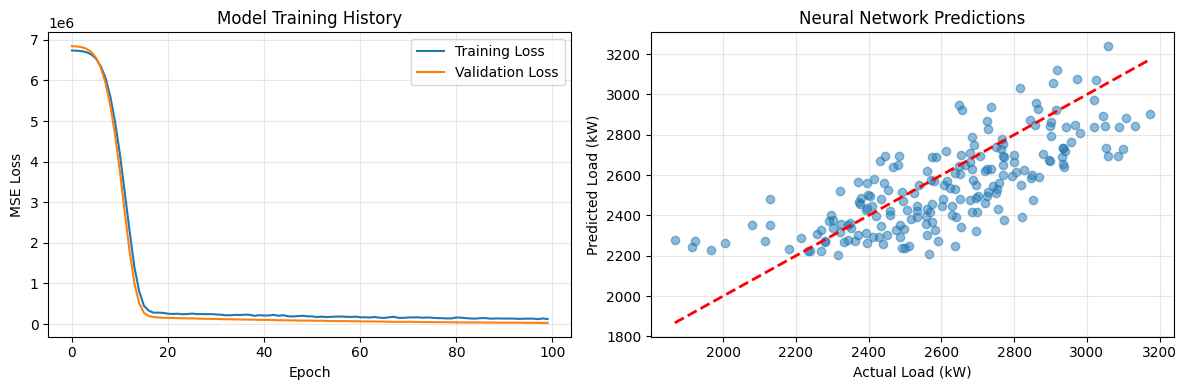

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic load data
np.random.seed(42)
n_samples = 1000

# Features: hour, day_of_week, temperature, humidity
hour = np.random.randint(0, 24, n_samples)
day_of_week = np.random.randint(0, 7, n_samples)
temperature = np.random.uniform(15, 35, n_samples)
humidity = np.random.uniform(30, 90, n_samples)

# Target: Load (with complex non-linear relationships)
load = (2000 +
        50 * hour - 2 * hour**2 +  # Hourly pattern
        100 * np.sin(2*np.pi*hour/24) +  # Diurnal cycle
        30 * temperature +  # Temperature effect
        -5 * humidity +  # Humidity effect
        -200 * (day_of_week >= 5) +  # Weekend effect
        np.random.normal(0, 50, n_samples))  # Noise

# Prepare data
X = np.column_stack([hour, day_of_week, temperature, humidity])
y = load

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features (important for neural networks!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),  # Hidden layer 1
    keras.layers.Dropout(0.2),  # Regularization
    keras.layers.Dense(32, activation='relu'),  # Hidden layer 2
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),  # Hidden layer 3
    keras.layers.Dense(1)  # Output layer (regression)
])

# Compile model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("Neural Network Architecture:")
model.summary()

# Train model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

# Evaluate
train_loss, train_mae = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"\nTraining MAE: {train_mae:.2f} kW")
print(f"Testing MAE: {test_mae:.2f} kW")

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
print(f"Test R²: {r2:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Training History')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Load (kW)')
plt.ylabel('Predicted Load (kW)')
plt.title('Neural Network Predictions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Reference: Goodfellow et al. (2016) "Deep Learning" |
# Hong et al. (2020) "Energy forecasting: A review" International Journal